In [ ]:
!pwd

/content


In [ ]:
cd /content/drive/MyDrive/freelancing/fake news

/content/drive/MyDrive/freelancing/fake news


In [ ]:
from google.colab import drive
drive.mount('/content/drive')

1. Libraries and Setup

In [ ]:
# Import required libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report
from sklearn.linear_model import LogisticRegression
from sklearn.naive_bayes import MultinomialNB
from sklearn.tree import DecisionTreeClassifier
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Embedding, LSTM, Dense, Dropout
from tensorflow.keras.preprocessing.text import Tokenizer
from tensorflow.keras.preprocessing.sequence import pad_sequences
from sklearn.metrics import precision_score, recall_score, f1_score


2. Load Dataset

In [ ]:
# Load the dataset
file_path = 'Dataset/WELFake_Dataset.csv'  # Update the path
df = pd.read_csv(file_path)


3. Exploratory Data Analysis (EDA)

basic information about the dataset

In [ ]:
# Display basic information about the dataset
print("Dataset Overview:")
print(df.info())

print("\nFirst Few Rows of the Dataset:")
print(df.head())

print("\nDataset Description:")
print(df.describe(include='all'))

# Check for missing values
print("\nMissing Values Count:")
print(df.isnull().sum())


Dataset Overview:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 72134 entries, 0 to 72133
Data columns (total 4 columns):
 #   Column      Non-Null Count  Dtype 
---  ------      --------------  ----- 
 0   Unnamed: 0  72134 non-null  int64 
 1   title       71576 non-null  object
 2   text        72095 non-null  object
 3   label       72134 non-null  int64 
dtypes: int64(2), object(2)
memory usage: 2.2+ MB
None

First Few Rows of the Dataset:
   Unnamed: 0                                              title  \
0           0  LAW ENFORCEMENT ON HIGH ALERT Following Threat...   
1           1                                                NaN   
2           2  UNBELIEVABLE! OBAMA’S ATTORNEY GENERAL SAYS MO...   
3           3  Bobby Jindal, raised Hindu, uses story of Chri...   
4           4  SATAN 2: Russia unvelis an image of its terrif...   

                                                text  label  
0  No comment is expected from Barack Obama Membe...      1  
1     Did they

Class Distribution

<ipython-input-27-1f3b29790818>:2: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(x='label', data=df, palette='Set2')


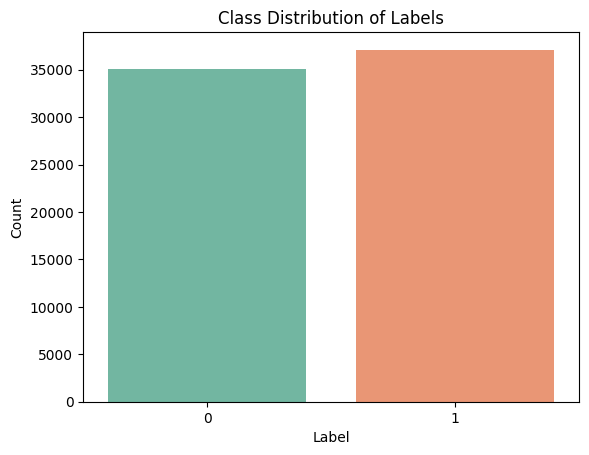


Class Distribution:
label
1    37106
0    35028
Name: count, dtype: int64

Class Percentages:
label
1    51.440375
0    48.559625
Name: count, dtype: float64


In [ ]:
# Distribution of 'label' (target variable)
sns.countplot(x='label', data=df, palette='Set2')
plt.title('Class Distribution of Labels')
plt.xlabel('Label')
plt.ylabel('Count')
plt.show()

# Percentage distribution
label_counts = df['label'].value_counts()
print(f"\nClass Distribution:\n{label_counts}")
print(f"\nClass Percentages:\n{label_counts / len(df) * 100}")


Text Length Analysis

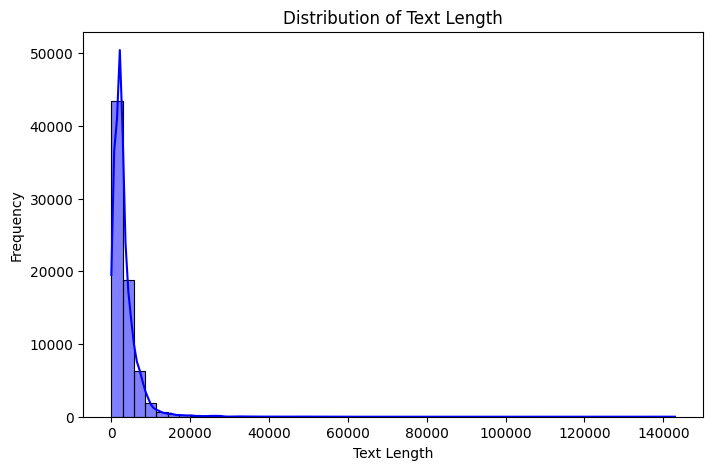


Average Text Length by Label:
label
0    3495.316690
1    3054.170538
Name: text_length, dtype: float64


In [ ]:
# Ensure all entries in the 'text' column are strings
df['text'] = df['text'].astype(str)

# Add a column for text length
df['text_length'] = df['text'].apply(len)

# Distribution of text length
plt.figure(figsize=(8, 5))
sns.histplot(df['text_length'], bins=50, kde=True, color='blue')
plt.title('Distribution of Text Length')
plt.xlabel('Text Length')
plt.ylabel('Frequency')
plt.show()

# Average text length for each class
avg_length = df.groupby('label')['text_length'].mean()
print(f"\nAverage Text Length by Label:\n{avg_length}")


Most Frequent Words

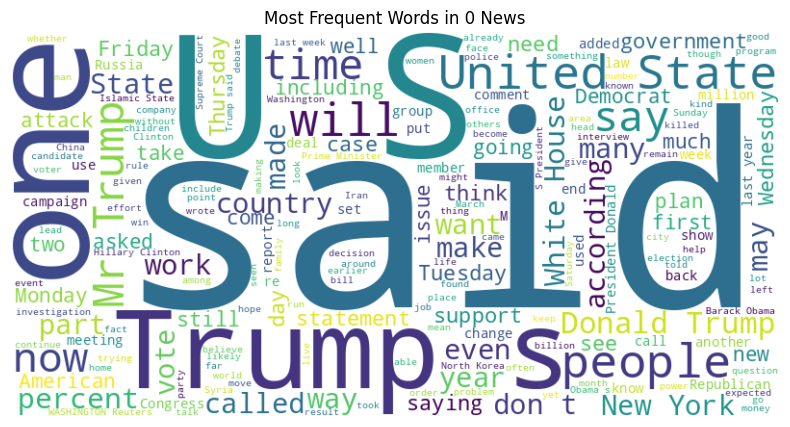

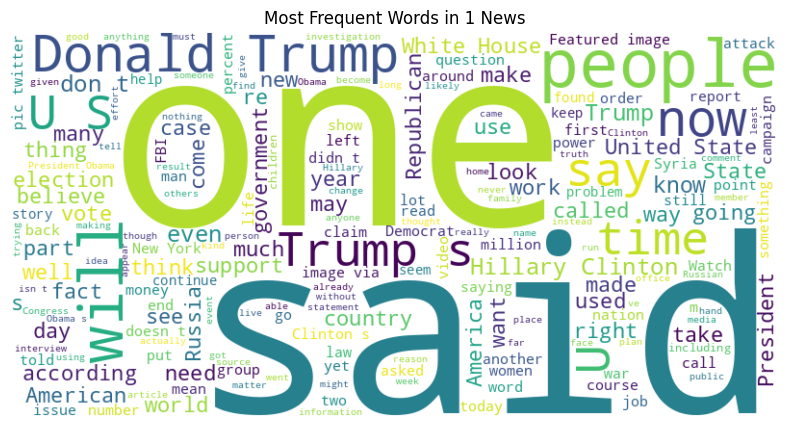

In [ ]:
#!pip install wordcloud
# Import necessary libraries
import matplotlib.pyplot as plt
import seaborn as sns
from wordcloud import WordCloud  # Import the WordCloud class

# Drop rows with missing or empty 'text' column
df = df.dropna(subset=['text'])
df = df[df['text'].str.strip() != ""]

# Generate WordCloud for FAKE and REAL news
for label, group in df.groupby('label'):
    text = " ".join(group['text'])
    if text.strip():  # Check if the text is non-empty
        wordcloud = WordCloud(width=800, height=400, background_color='white').generate(text)
        plt.figure(figsize=(10, 5))
        plt.imshow(wordcloud, interpolation='bilinear')
        plt.axis('off')
        plt.title(f'Most Frequent Words in {label} News')
        plt.show()
    else:
        print(f"No valid text available for {label} news.")


Text Token Analysis

In [ ]:
import nltk
nltk.download('punkt_tab')

[nltk_data] Downloading package punkt_tab to /root/nltk_data...
[nltk_data]   Unzipping tokenizers/punkt_tab.zip.


True

In [ ]:
# Tokenization for analysis
from nltk.tokenize import word_tokenize
from collections import Counter
import nltk
nltk.download('punkt')

# Tokenize the entire dataset
df['tokens'] = df['text'].apply(word_tokenize)

# Count total tokens and unique tokens
total_tokens = sum(df['tokens'].apply(len))
unique_tokens = len(set(word for tokens in df['tokens'] for word in tokens))

print(f"\nTotal Tokens in Dataset: {total_tokens}")
print(f"Total Unique Tokens in Dataset: {unique_tokens}")


[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Package punkt is already up-to-date!



Total Tokens in Dataset: 44581008
Total Unique Tokens in Dataset: 437227


Word Frequency Analysis

In [ ]:
from nltk.tokenize import word_tokenize
from collections import Counter
import nltk
nltk.download('punkt')


[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Package punkt is already up-to-date!


True

<ipython-input-31-06ba3ee7d5ef>:10: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=counts, y=words, palette='viridis')


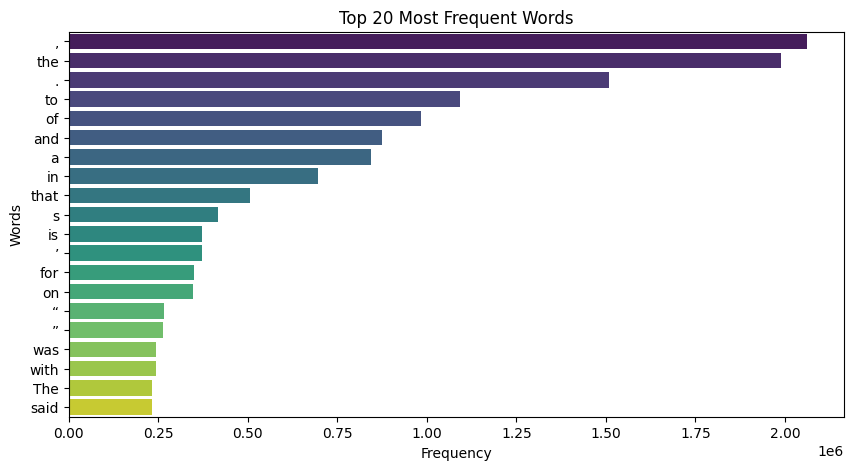

In [ ]:
# Get word frequency distribution
all_words = [word for tokens in df['tokens'] for word in tokens]
word_freq = Counter(all_words)

# Plot top 20 most common words
common_words = word_freq.most_common(20)
words, counts = zip(*common_words)

plt.figure(figsize=(10, 5))
sns.barplot(x=counts, y=words, palette='viridis')
plt.title('Top 20 Most Frequent Words')
plt.xlabel('Frequency')
plt.ylabel('Words')
plt.show()


Correlation Between Text Length and Labels

<ipython-input-32-f21a9cba91b6>:3: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(x='label', y='text_length', data=df, palette='coolwarm')


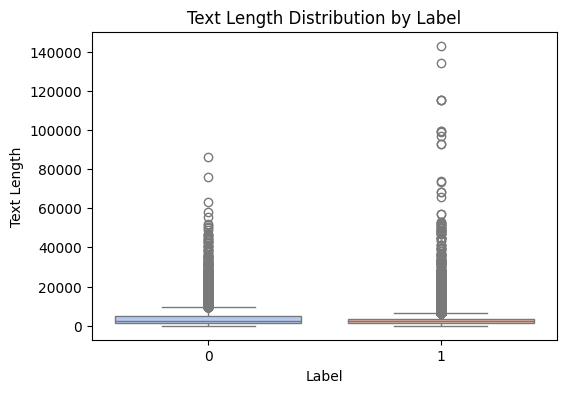

In [ ]:
# Correlation heatmap
plt.figure(figsize=(6, 4))
sns.boxplot(x='label', y='text_length', data=df, palette='coolwarm')
plt.title('Text Length Distribution by Label')
plt.xlabel('Label')
plt.ylabel('Text Length')
plt.show()


4. Data Preprocessing

In [ ]:
import nltk
nltk.download('stopwords')

[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Unzipping corpora/stopwords.zip.


True

In [ ]:
# Text preprocessing function
import re
from nltk.corpus import stopwords
from nltk.stem import PorterStemmer

stop_words = set(stopwords.words('english'))
stemmer = PorterStemmer()

def preprocess_text(text):
    text = re.sub(r'\W', ' ', text)
    text = re.sub(r'\s+', ' ', text)
    text = text.lower()
    words = [stemmer.stem(word) for word in text.split() if word not in stop_words]
    return ' '.join(words)

df['cleaned_text'] = df['text'].apply(preprocess_text)


5. Feature Extraction

In [ ]:
# Splitting dataset
X = df['cleaned_text']
y = df['label']

# Encoding labels
from sklearn.preprocessing import LabelEncoder
label_encoder = LabelEncoder()
y = label_encoder.fit_transform(y)

# Train-test split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# TF-IDF Vectorization
tfidf = TfidfVectorizer(max_features=5000)
X_train_tfidf = tfidf.fit_transform(X_train).toarray()
X_test_tfidf = tfidf.transform(X_test).toarray()


6. Machine Learning Models

Logistic Regression

In [ ]:
log_reg = LogisticRegression()
log_reg.fit(X_train_tfidf, y_train)
y_pred_log = log_reg.predict(X_test_tfidf)
print("Logistic Regression Accuracy:", accuracy_score(y_test, y_pred_log))
print(confusion_matrix(y_test, y_pred_log))
print(classification_report(y_test, y_pred_log))


Logistic Regression Accuracy: 0.9418451514521383
[[6614  475]
 [ 364 6974]]
              precision    recall  f1-score   support

           0       0.95      0.93      0.94      7089
           1       0.94      0.95      0.94      7338

    accuracy                           0.94     14427
   macro avg       0.94      0.94      0.94     14427
weighted avg       0.94      0.94      0.94     14427



Naive Bayes

In [ ]:
nb = MultinomialNB()
nb.fit(X_train_tfidf, y_train)
y_pred_nb = nb.predict(X_test_tfidf)
print("Naive Bayes Accuracy:", accuracy_score(y_test, y_pred_nb))
print(confusion_matrix(y_test, y_pred_nb))
print(classification_report(y_test, y_pred_nb))


Naive Bayes Accuracy: 0.8493103209260414
[[5828 1261]
 [ 913 6425]]
              precision    recall  f1-score   support

           0       0.86      0.82      0.84      7089
           1       0.84      0.88      0.86      7338

    accuracy                           0.85     14427
   macro avg       0.85      0.85      0.85     14427
weighted avg       0.85      0.85      0.85     14427



Decision Tree Classifier

In [ ]:
dtc = DecisionTreeClassifier()
dtc.fit(X_train_tfidf, y_train)
y_pred_dtc = dtc.predict(X_test_tfidf)
print("Decision Tree Accuracy:", accuracy_score(y_test, y_pred_dtc))
print(confusion_matrix(y_test, y_pred_dtc))
print(classification_report(y_test, y_pred_dtc))


Decision Tree Accuracy: 0.9166839952866154
[[6384  705]
 [ 497 6841]]
              precision    recall  f1-score   support

           0       0.93      0.90      0.91      7089
           1       0.91      0.93      0.92      7338

    accuracy                           0.92     14427
   macro avg       0.92      0.92      0.92     14427
weighted avg       0.92      0.92      0.92     14427



LSTM

In [ ]:
# Tokenization for LSTM
tokenizer = Tokenizer(num_words=5000)
tokenizer.fit_on_texts(X_train)
X_train_seq = pad_sequences(tokenizer.texts_to_sequences(X_train), maxlen=200)
X_test_seq = pad_sequences(tokenizer.texts_to_sequences(X_test), maxlen=200)

# LSTM Model
model = Sequential([
    Embedding(input_dim=5000, output_dim=128, input_length=200),
    LSTM(128, dropout=0.2, recurrent_dropout=0.2),
    Dense(1, activation='sigmoid')
])
model.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy'])

# Training the model
model.fit(X_train_seq, y_train, validation_split=0.2, epochs=5, batch_size=64)

# Evaluation
y_pred_lstm = (model.predict(X_test_seq) > 0.5).astype("int32")
print("LSTM Accuracy:", accuracy_score(y_test, y_pred_lstm))
print(confusion_matrix(y_test, y_pred_lstm))
print(classification_report(y_test, y_pred_lstm))


/usr/local/lib/python3.10/dist-packages/keras/src/layers/core/embedding.py:90: UserWarning: Argument `input_length` is deprecated. Just remove it.
  warnings.warn(


Epoch 1/5
722/722 ━━━━━━━━━━━━━━━━━━━━ 402s 553ms/step - accuracy: 0.8698 - loss: 0.3165 - val_accuracy: 0.9255 - val_loss: 0.2171
Epoch 2/5
722/722 ━━━━━━━━━━━━━━━━━━━━ 405s 561ms/step - accuracy: 0.9222 - loss: 0.1983 - val_accuracy: 0.9316 - val_loss: 0.1912
Epoch 3/5
722/722 ━━━━━━━━━━━━━━━━━━━━ 400s 555ms/step - accuracy: 0.9299 - loss: 0.1843 - val_accuracy: 0.9405 - val_loss: 0.1659
Epoch 4/5
722/722 ━━━━━━━━━━━━━━━━━━━━ 446s 561ms/step - accuracy: 0.9525 - loss: 0.1261 - val_accuracy: 0.9507 - val_loss: 0.1358
Epoch 5/5
722/722 ━━━━━━━━━━━━━━━━━━━━ 456s 579ms/step - accuracy: 0.9638 - loss: 0.1009 - val_accuracy: 0.9507 - val_loss: 0.1352
451/451 ━━━━━━━━━━━━━━━━━━━━ 57s 125ms/step
LSTM Accuracy: 0.9532127261384903
[[6792  297]
 [ 378 6960]]
              precision    recall  f1-score   support

           0       0.95      0.96      0.95      7089
           1       0.96      0.95      0.95      7338

    accuracy                           0.95     14427
   macro avg       0.9

Comparison

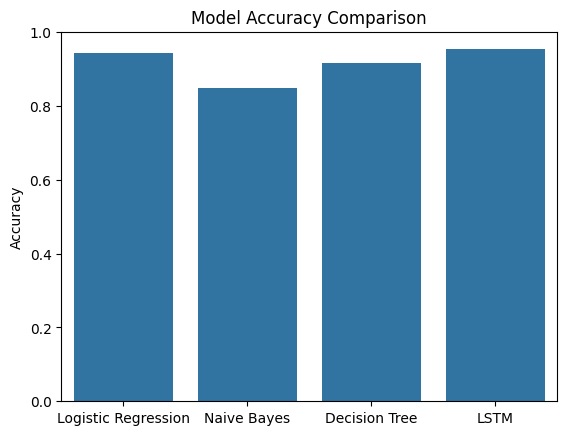

In [ ]:
# Accuracy comparison
accuracy_scores = {
    'Logistic Regression': accuracy_score(y_test, y_pred_log),
    'Naive Bayes': accuracy_score(y_test, y_pred_nb),
    'Decision Tree': accuracy_score(y_test, y_pred_dtc),
    'LSTM': accuracy_score(y_test, y_pred_lstm)
}

sns.barplot(x=list(accuracy_scores.keys()), y=list(accuracy_scores.values()))
plt.title('Model Accuracy Comparison')
plt.ylabel('Accuracy')
plt.show()


7. Model Evaluation: Comparison Table and Graphs

In [ ]:
# Collect metrics for each model
models = ['Logistic Regression', 'Naive Bayes', 'Decision Tree', 'LSTM']
y_preds = [y_pred_log, y_pred_nb, y_pred_dtc, y_pred_lstm.flatten()]

metrics = {
    'Model': [],
    'Accuracy': [],
    'Precision': [],
    'Recall': [],
    'F1-Score': []
}

for i, y_pred in enumerate(y_preds):
    metrics['Model'].append(models[i])
    metrics['Accuracy'].append(accuracy_score(y_test, y_pred))
    metrics['Precision'].append(precision_score(y_test, y_pred))
    metrics['Recall'].append(recall_score(y_test, y_pred))
    metrics['F1-Score'].append(f1_score(y_test, y_pred))

metrics_df = pd.DataFrame(metrics)

# Display the comparison table
print(metrics_df)

# Save comparison table as a CSV if needed
metrics_df.to_csv('model_comparison.csv', index=False)


                 Model  Accuracy  Precision    Recall  F1-Score
0  Logistic Regression  0.941845   0.936233  0.950395  0.943261
1          Naive Bayes  0.849310   0.835935  0.875579  0.855298
2        Decision Tree  0.916684   0.906573  0.932270  0.919242
3                 LSTM  0.953213   0.959074  0.948487  0.953751


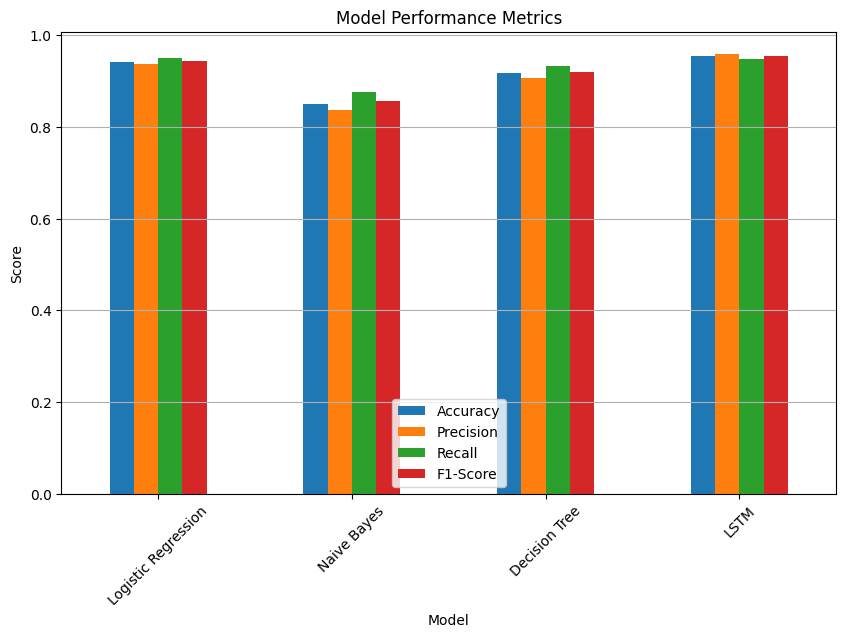

In [ ]:
# Bar graph for metrics
metrics_df.set_index('Model').plot(kind='bar', figsize=(10, 6))
plt.title('Model Performance Metrics')
plt.ylabel('Score')
plt.xticks(rotation=45)
plt.grid(axis='y')
plt.show()


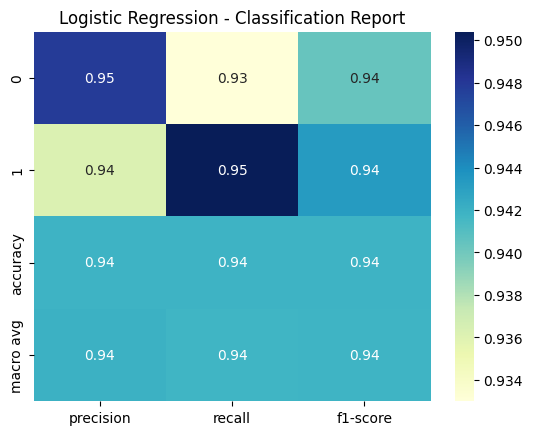

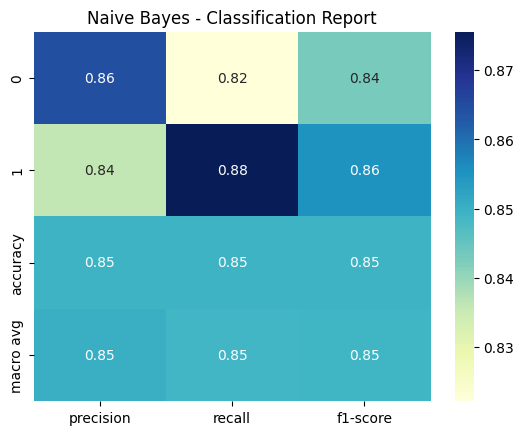

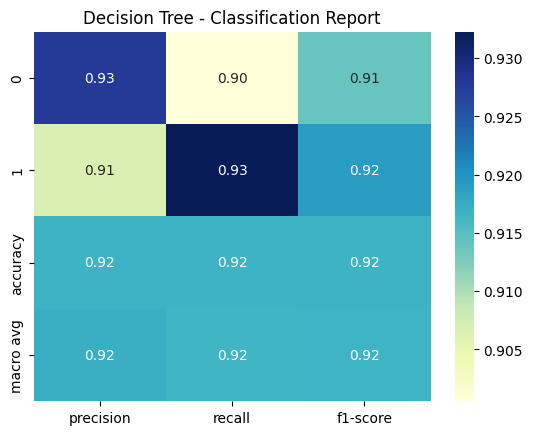

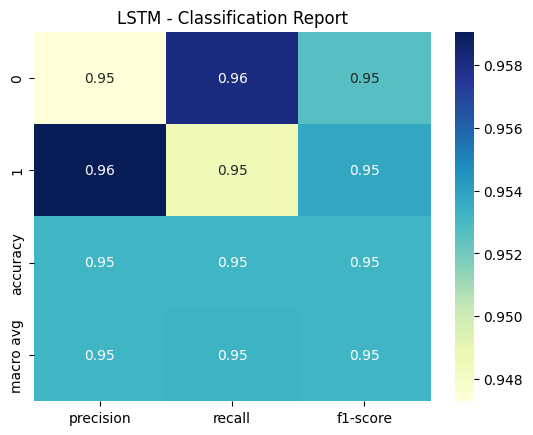

In [ ]:
# Function to display classification report as a heatmap
def plot_classification_report(y_true, y_pred, title):
    report = classification_report(y_true, y_pred, output_dict=True)
    report_df = pd.DataFrame(report).transpose()
    sns.heatmap(report_df.iloc[:-1, :-1], annot=True, cmap="YlGnBu", fmt=".2f")
    plt.title(title)
    plt.show()

# Plot classification reports for each model
for i, y_pred in enumerate(y_preds):
    plot_classification_report(y_test, y_pred, f"{models[i]} - Classification Report")


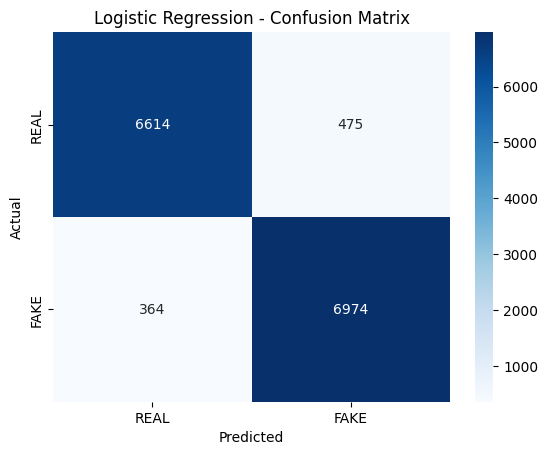

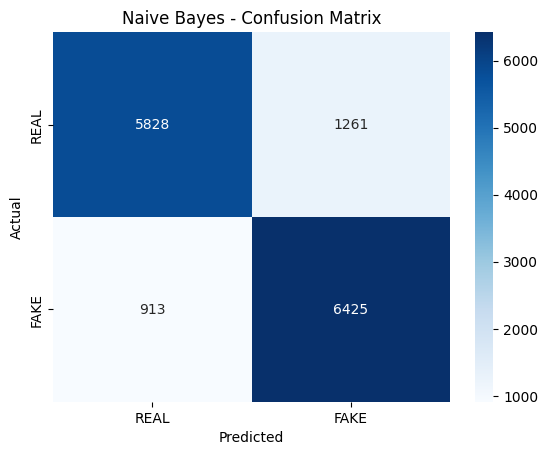

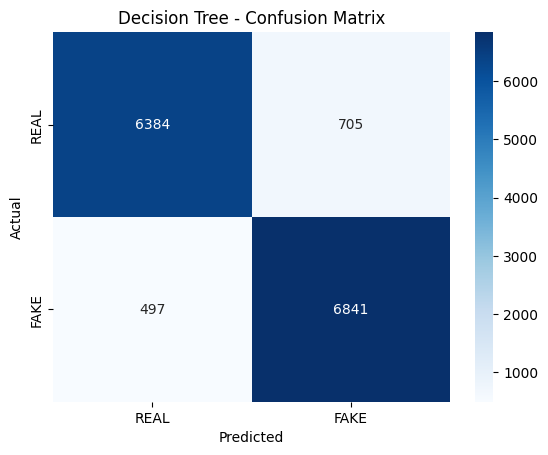

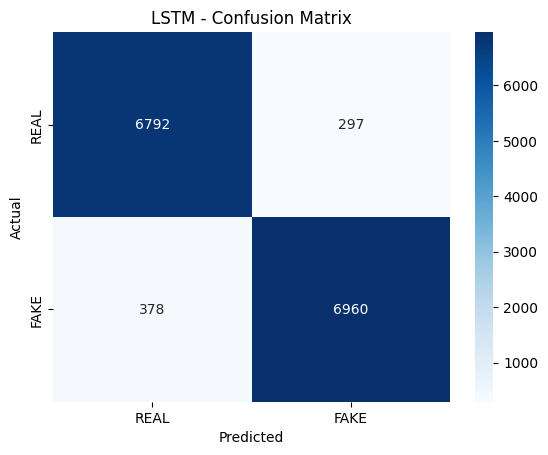

In [ ]:
# Function to display confusion matrix as a heatmap
def plot_confusion_matrix(y_true, y_pred, title):
    cm = confusion_matrix(y_true, y_pred)
    sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', xticklabels=['REAL', 'FAKE'], yticklabels=['REAL', 'FAKE'])
    plt.title(title)
    plt.xlabel('Predicted')
    plt.ylabel('Actual')
    plt.show()

# Plot confusion matrices for each model
for i, y_pred in enumerate(y_preds):
    plot_confusion_matrix(y_test, y_pred, f"{models[i]} - Confusion Matrix")


8. Save the Best Model

In [ ]:
# Identify the best model based on accuracy
best_model_index = metrics_df['Accuracy'].idxmax()
best_model_name = metrics_df.iloc[best_model_index]['Model']

print(f"The best model is: {best_model_name}")

# Save the best model
import joblib

if best_model_name == 'Logistic Regression':
    joblib.dump(log_reg, 'best_model.pkl')
    best_model = log_reg
elif best_model_name == 'Naive Bayes':
    joblib.dump(nb, 'best_model.pkl')
    best_model = nb
elif best_model_name == 'Decision Tree':
    joblib.dump(dtc, 'best_model.pkl')
    best_model = dtc
else:  # LSTM
    model.save('best_model_lstm.h5')
    best_model = model


The best model is: LSTM


9. Load the Saved Model and Classify a New Instance

In [ ]:
# Load the saved model
if best_model_name == 'LSTM':
    loaded_model = tf.keras.models.load_model('best_model_lstm.h5')
else:
    loaded_model = joblib.load('best_model.pkl')

# New text instance for classification
new_text = "Breaking news: Stock markets are fluctuating wildly due to political tensions."

# Preprocess the new text
new_text_cleaned = preprocess_text(new_text)

if best_model_name == 'LSTM':
    # Tokenize and pad the text for LSTM
    new_text_seq = pad_sequences(tokenizer.texts_to_sequences([new_text_cleaned]), maxlen=200)
    prediction = (loaded_model.predict(new_text_seq) > 0.5).astype("int32")[0][0]
else:
    # Transform the text using TF-IDF vectorizer
    new_text_tfidf = tfidf.transform([new_text_cleaned]).toarray()
    prediction = loaded_model.predict(new_text_tfidf)[0]

# Decode the label
label = 'FAKE' if prediction == 1 else 'REAL'
print(f"The classified label for the new text is: {label}")


1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 270ms/step
The classified label for the new text is: FAKE
